# Neural Nets to Predict Subject from DEAP Data Using OMA Modes

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *

In [12]:
PATH = "/media/tris/tris_files/github/SysID_EEGdynamics/src/data/preprocessed/tabular_DMD"

In [10]:
# col_names=['subject','trial','mode_no','real1','real2','real3','real4','real5','real6','real7','real8','real9','real10','real11','real12','real13','real14','real15','real16','real17','real18','real19','real20','real21','real22','real23','real24','real25','real26','real27','real28','real29','real30','real31','real32','imag1','imag2','imag3','imag4','imag5','imag6','imag7','imag8','imag9','imag10','imag11','imag12','imag13','imag14','imag15','imag16','imag17','imag18','imag19','imag20','imag21','imag22','imag23','imag24','imag25','imag26','imag27','imag28','imag29','imag30','imag31','imag32','fn','zeta'];

In [13]:
df_raw = pd.read_csv('/media/tris/tris_files/github/SysID_EEGdynamics/src/data/preprocessed/tabular_DMD/dmd_deap_100modes_vecs_header.csv')
df_raw

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
0,1,1,1,-0.233814,0.653657,1.119798,1.118466,-1.255351,-1.236550,1.164892,...,0.358402,0.231342,-0.282112,-0.102463,1.269087,-0.602535,0.980090,0.583008,39.773965,0.037864
1,1,1,2,-0.969863,-0.720410,-0.466967,-0.403137,-0.033661,-0.303601,0.516251,...,0.292212,0.683578,0.712324,0.220430,-0.325849,1.042614,-0.439303,-0.508781,39.247203,0.039895
2,1,1,3,1.700171,1.721272,1.682740,1.707089,1.173998,0.844426,0.774884,...,0.733444,1.213559,1.093763,0.406481,1.063819,1.420983,0.799485,0.448324,37.805621,0.051107
3,1,1,4,0.720502,1.007657,1.283749,0.814081,-0.209438,0.377033,0.619588,...,0.091587,-0.222744,0.090740,0.001649,0.065053,0.141014,-0.120066,-0.383417,36.233767,0.056515
4,1,1,5,0.177535,0.185284,0.119175,-0.289875,-0.300527,0.045760,-0.443727,...,0.132251,1.767138,0.348059,-0.511474,-0.909534,0.003420,-1.370316,-1.478614,33.840774,0.078882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,32,40,46,1.332834,0.458221,1.152535,-1.927631,-0.077903,1.881693,0.931110,...,-0.728442,0.466957,-4.243140,-1.094212,-0.893601,-2.149343,-2.515235,-1.037549,8.010576,0.147832
63996,32,40,47,-2.554262,-2.770043,-0.071107,-1.917483,1.219112,0.777120,1.624867,...,2.058085,-1.567285,2.461179,1.790917,1.097920,-1.484108,2.898821,-0.070275,7.610978,0.154817
63997,32,40,48,1.769437,7.856667,3.457387,12.130922,0.863311,-0.122387,-2.668721,...,-1.628713,0.317715,-0.247429,-0.554011,-1.184486,-0.994303,-0.054431,-0.227949,7.332086,0.166979
63998,32,40,49,2.033926,5.380182,3.489802,7.566818,2.008225,1.209121,-0.942851,...,-0.984694,0.066438,-1.360488,-0.618895,-1.474774,-1.446316,-0.970886,-1.971653,8.987644,0.184399


In [14]:
df_raw.iloc[[40],:]

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
40,1,1,41,-0.528828,-1.250851,-2.298565,-0.089783,-1.076812,-1.97694,-0.157367,...,1.22405,-1.133452,0.368515,1.116685,1.359537,-0.162272,1.608768,1.324755,10.243236,0.166065


In [15]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [16]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
0,1,1,1,-0.233814,0.653657,1.119798,1.118466,-1.255351,-1.236550,1.164892,...,0.358402,0.231342,-0.282112,-0.102463,1.269087,-0.602535,0.980090,0.583008,39.773965,0.037864
1,1,1,2,-0.969863,-0.720410,-0.466967,-0.403137,-0.033661,-0.303601,0.516251,...,0.292212,0.683578,0.712324,0.220430,-0.325849,1.042614,-0.439303,-0.508781,39.247203,0.039895
2,1,1,3,1.700171,1.721272,1.682740,1.707089,1.173998,0.844426,0.774884,...,0.733444,1.213559,1.093763,0.406481,1.063819,1.420983,0.799485,0.448324,37.805621,0.051107
3,1,1,4,0.720502,1.007657,1.283749,0.814081,-0.209438,0.377033,0.619588,...,0.091587,-0.222744,0.090740,0.001649,0.065053,0.141014,-0.120066,-0.383417,36.233767,0.056515
4,1,1,5,0.177535,0.185284,0.119175,-0.289875,-0.300527,0.045760,-0.443727,...,0.132251,1.767138,0.348059,-0.511474,-0.909534,0.003420,-1.370316,-1.478614,33.840774,0.078882


In [17]:
df_raw.iloc[[500],:]

,subject,trial,mode_no,real1,real2,real3,real4,real5,real6,real7,...,imag25,imag26,imag27,imag28,imag29,imag30,imag31,imag32,fn,zeta
500,1,11,1,0.178785,0.272437,0.228788,0.644095,0.200991,0.267701,0.146553,...,0.426605,-0.154495,-0.17773,0.073013,0.625952,-0.500592,0.467191,0.362193,39.860901,0.032477


Text(0.5, 1.0, 'Real Chan. 5')

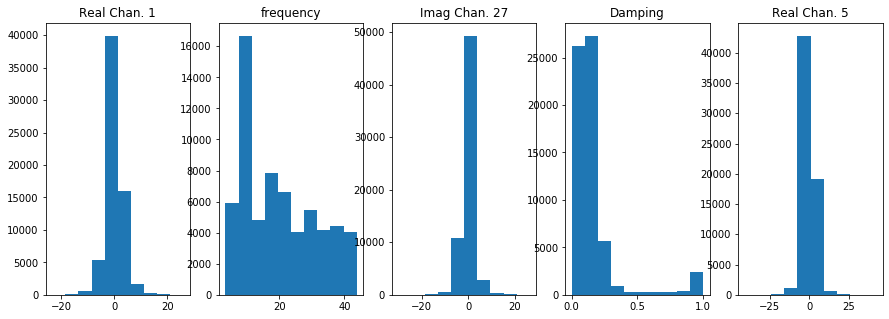

In [18]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_raw.real1)
axs[0].set_title('Real Chan. 1')
axs[1].hist(df_raw.fn)
axs[1].set_title('frequency')
axs[2].hist(df_raw.imag27)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta)
axs[3].set_title('Damping')
axs[4].hist(df_raw.real5)
axs[4].set_title('Real Chan. 5')

In [19]:
valid_idx=np.random.randint(low=0, high=len(df_raw), size=12800)

In [20]:
dep_var= 'subject'

In [22]:
path = "/media/tris/tris_files/github/SysID_EEGdynamics/src/data/preprocessed/tabular_DMD"

In [23]:
data = TabularDataBunch.from_df(path, df_raw, dep_var, valid_idx=valid_idx)

In [24]:
data.show_batch()

imag6,real24,real10,real9,real8,real31,imag8,real7,imag12,imag28,real28,imag3,imag14,real21,real12,imag32,imag18,imag9,imag13,imag15,real25,real22,real13,real32,imag17,real16,imag7,real3,imag25,imag30,trial,imag10,imag2,real18,zeta,real29,real11,imag31,imag29,mode_no,imag11,imag1,fn,real14,imag23,real15,imag4,real17,real20,imag20,real30,imag22,real23,real4,real6,real5,imag21,imag16,real26,imag24,real2,real27,imag27,real19,real1,imag19,imag26,imag5,target
0.0618,-6.8113,-3.2911,1.0691,1.0454,2.8274,2.2092,-1.5796,-1.5899,1.5273,-4.5497,5.3310,-0.9322,0.6875,3.9414,-1.0597,-4.1586,1.6133,0.9950,-2.7149,0.3931,4.8175,1.9352,1.6976,-10.3957,3.5277,1.7736,-8.6985,-2.8775,-3.1682,27.0000,4.6542,0.5017,-4.8210,0.1218,0.9046,2.6120,3.1191,3.5395,47.0000,1.1489,-3.0366,8.0384,2.8850,-2.4561,0.1993,1.0910,-6.8597,0.0890,1.3415,6.4844,0.3429,-6.8435,-0.0310,-1.7096,-3.1706,1.3276,0.4329,7.8947,2.3767,0.9118,6.8345,-0.4113,0.9851,-3.3767,0.9271,-2.3876,0.8740,14
-0.5364,0.7423,-0.3249,-0.5543,-0.5915,0.2369,-2.9991,-0.3768,-3.0541,2.3642,0.5357,-4.5991,-1.4486,0.0894,-0.6124,1.8570,0.8561,-1.4734,-1.3471,-0.4018,0.8119,0.8572,-0.6169,0.1776,0.8375,-0.3145,-1.6626,-0.6595,4.0794,1.4746,17.0000,-1.2893,0.9755,0.6775,0.0163,0.4976,-0.4523,0.7317,2.8710,19.0000,-0.2427,-4.1534,21.9513,-0.6158,3.1098,-0.4742,-1.8248,0.4366,0.8191,1.9290,0.3535,0.8412,0.9052,-0.8629,-0.2101,-0.7007,0.3952,-1.4422,0.4150,3.7277,-0.5813,0.4809,-0.4998,0.7811,-0.8692,2.5384,0.2765,-1.8905,27
-1.8214,-0.8452,-0.2305,-1.3108,0.1805,0.3038,-0.7283,-0.3404,0.2020,-3.1663,-0.6038,3.0816,-0.5356,0.9681,-0.1271,-0.2453,1.9470,-3.8976,1.1082,0.7712,-0.5879,0.4100,0.1637,-0.0053,1.7096,-0.1627,0.2026,0.2811,-3.8048,-6.5496,26.0000,-0.9387,7.5123,0.4707,0.0624,0.7472,0.1237,1.0983,2.8882,9.0000,1.3888,4.2398,32.6054,-0.1500,-2.6081,0.1943,3.4784,0.2317,-0.1158,-1.2995,-1.1545,-1.2368,-0.4164,0.2679,-0.4821,-0.2570,4.2448,-0.6068,0.8062,-4.2826,1.4190,-0.5777,-4.2532,0.0555,0.7438,0.1459,1.8961,0.0599,29
1.3456,5.6998,0.4600,-3.8145,-4.7225,-2.6237,4.0742,-2.0102,5.8331,-7.5778,5.7512,-10.3281,1.0088,-0.3529,-4.7021,-1.1390,3.2748,1.0973,-2.2257,-0.5725,4.0154,-2.7242,-2.4139,-0.7116,5.0509,-3.1109,-1.9149,4.8046,3.3376,3.8659,25.0000,-8.5116,0.9258,5.2076,0.9559,-0.2658,-3.7250,-5.2487,-6.8042,30.0000,-0.8693,-2.3708,7.8425,-2.5940,-0.0503,1.1484,1.3363,9.5427,-0.7922,3.6466,-3.3101,6.0966,8.4785,-1.7739,-0.5118,0.3245,1.4246,-1.7233,-3.1229,-5.9598,-1.7603,-3.4861,3.1633,-2.3803,5.4764,4.4076,6.1612,-0.7542,14
0.5056,0.4118,-0.4686,-1.4963,4.6500,-0.3240,2.5437,-0.8613,-1.9158,-0.5393,-0.2977,3.0099,-2.1526,0.2178,0.2323,-2.0161,0.6209,-1.9612,-2.1974,-2.4697,-1.0196,-0.4523,-0.4287,-1.1001,0.4623,-1.1532,0.9242,1.4595,-1.0735,-1.3098,37.0000,0.2606,2.1030,0.7173,0.1890,-0.7825,-0.5189,-1.7822,-1.5682,44.0000,-1.2820,-0.1809,9.1979,-0.2206,0.3916,0.0240,3.0516,1.1808,0.9399,-1.0311,-0.9128,-1.6515,0.7220,-6.7511,3.3029,0.5567,2.2754,-0.1037,-0.0525,0.6972,0.9308,-1.6823,-0.6596,1.3993,1.7774,1.9225,-0.7737,5.9000,23


In [25]:
max_log_y = np.log(np.max(df_raw['subject'])*1.2)
y_range = torch.tensor([0, max_log_y])

In [26]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy, emb_szs={'subject': 32})

In [27]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(68, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=68, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=500, out_features=32, bias=True)
  )
)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


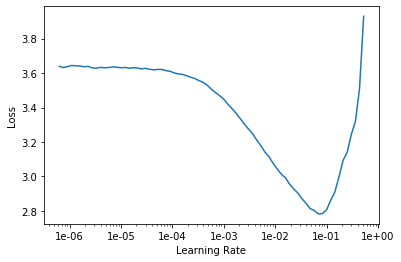

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.637617,0.609089,0.847891,00:03
1,0.515837,0.537262,0.855703,00:03
2,0.364628,0.336910,0.916875,00:03
3,0.203245,0.163272,0.966094,00:03
4,0.104550,0.069342,0.982813,00:03


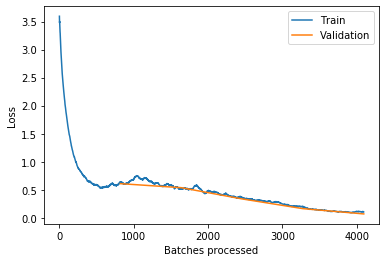

In [30]:
learn.recorder.plot_losses()

In [31]:
learn.show_results()

imag6,real24,real10,real9,real8,real31,imag8,real7,imag12,imag28,real28,imag3,imag14,real21,real12,imag32,imag18,imag9,imag13,imag15,real25,real22,real13,real32,imag17,real16,imag7,real3,imag25,imag30,trial,imag10,imag2,real18,zeta,real29,real11,imag31,imag29,mode_no,imag11,imag1,fn,real14,imag23,real15,imag4,real17,real20,imag20,real30,imag22,real23,real4,real6,real5,imag21,imag16,real26,imag24,real2,real27,imag27,real19,real1,imag19,imag26,imag5,target,prediction
-1.2309,2.2857,2.0324,-5.1868,-1.7525,-8.3144,-2.1571,-10.7111,-2.3888,-2.1298,3.6274,0.7837,0.3195,5.1787,8.6343,1.3543,2.5249,-2.9821,-2.5398,0.1192,1.6623,6.1540,3.5048,-0.3182,3.3431,-4.7002,0.2089,1.6732,0.1688,0.8640,13.0000,-2.4655,1.3313,0.6368,0.1817,1.7516,-7.4539,1.4743,0.1602,41.0000,-2.5996,1.8570,9.9027,-0.7776,-0.3368,0.1547,1.3089,-14.4974,4.7384,1.4445,-2.1981,0.8352,4.4974,-0.4185,-1.2493,7.5176,1.7645,-1.1035,-4.9688,-1.9828,2.7622,2.0180,0.2102,5.3548,-1.6375,0.8321,2.0960,-1.0839,3,3
4.2207,-0.1946,-2.1644,-2.1844,-3.8520,-0.6233,-2.8586,0.6493,-0.5819,0.3710,2.9036,-0.9203,-3.7374,4.2794,3.1294,-1.5580,2.5081,-1.2545,-3.8207,-2.7233,6.0808,2.9755,-4.1496,-0.2351,2.4207,0.9772,2.9123,-5.0992,0.9550,-1.6079,35.0000,2.7524,-2.2727,1.7285,0.1185,3.4125,-1.6306,-1.6076,0.4470,47.0000,-0.7471,-0.3181,8.4871,-1.8887,0.2960,-1.6446,-1.0150,0.7461,-0.6075,0.3656,-0.3646,0.4125,0.7885,-2.0837,1.9960,-0.3409,2.3269,0.9844,1.7282,1.5116,-6.8258,4.1627,0.6582,2.0349,-3.7037,3.9142,-2.5444,0.5111,12,12
2.3051,-0.4782,0.2546,-1.9677,-3.0925,5.1393,4.0200,-0.3932,-0.6761,-1.3480,1.0228,-0.9488,3.1364,-2.9156,1.0725,0.3522,1.2870,2.5629,0.7521,-4.9864,-0.8155,-1.5420,-0.3682,-0.3313,1.9042,0.1708,0.5156,0.6672,0.9739,-0.5897,16.0000,-0.1795,3.2336,-1.1368,0.0175,1.5943,-0.7503,-6.8613,-2.1144,1.0000,1.0828,-1.9076,41.7889,-2.5175,0.4006,3.4875,1.5401,-1.3596,3.3366,-3.8353,0.2661,1.8280,-0.0923,-1.2658,-1.5184,1.3232,3.7631,-0.2295,-1.5109,0.6174,-3.0107,3.2788,-4.6913,1.7491,1.7036,-2.1541,1.9514,-1.7042,2,2
0.1888,2.6930,3.1297,-0.2153,-2.0351,-1.6413,1.4526,1.9041,-0.7685,-2.2232,0.8459,0.4423,-1.6347,-0.8891,0.4757,-1.5226,-0.7015,-2.6012,1.5972,-0.3397,4.9839,-1.2667,0.2920,-1.2257,-0.3719,2.0543,-0.6046,-0.2382,0.1903,-0.1540,34.0000,1.9373,1.5577,-2.2476,0.1478,1.5713,-2.7934,-4.8956,-1.2042,45.0000,-1.4680,0.9744,7.4882,-2.0138,11.4719,-2.1473,0.2964,-0.6066,0.8771,-2.1691,-1.0921,1.3876,8.0736,-7.6833,2.3647,-0.8928,0.0666,2.1026,-2.6540,0.6089,-3.4032,0.9729,-4.5433,4.2691,-1.4621,1.0779,0.7909,-0.9413,32,32
0.2429,2.4546,0.0104,-3.0218,0.2919,-8.6681,4.1518,2.0842,-4.0230,1.4245,-2.1673,3.6106,0.8628,2.2257,-3.3461,0.8242,8.7929,2.4676,1.4239,-4.9340,0.6402,4.7427,-5.9489,-4.3592,5.0226,-2.1919,-1.7305,3.0707,-5.4627,-1.6538,28.0000,-2.6080,4.6673,2.0112,0.2079,-2.4865,-3.9772,4.6595,-4.8242,26.0000,-1.5264,5.6270,15.2661,-5.6094,-3.9841,-4.1324,2.3077,2.9200,1.8188,5.9565,-0.1358,-10.0667,4.0979,2.5635,2.8035,3.0244,2.1195,-1.6290,1.1275,-3.0430,3.6612,-2.1998,-4.2566,5.2839,3.4122,-5.4049,4.1451,-3.1595,24,24
